In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mlp

In [4]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split

In [6]:
def load_mnist():
        mnist = fetch_mldata('MNIST original')
        mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                                   mnist.target.astype('int32'), random_state=42)
        mnist_X = mnist_X / 255.0
        return train_test_split(mnist_X, mnist_y,
                    test_size=0.2,
                    random_state=42)

X_train, X_test, y_train, y_test = load_mnist()
n_output = 10
n_features = X_train.shape[1]
clf = mlp.MultiLayerPerceptron(n_output, n_features).fit(X_train, y_train, print_progress = True)
y_pred = clf.predict(X_test)

Epoch: 500/500

In [7]:
precision = np.sum(y_test == y_pred) / len(y_test)

In [9]:
y_test == y_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [10]:
y_test

array([7, 5, 8, ..., 9, 1, 2], dtype=int32)

In [11]:
y_pred

array([6, 6, 6, ..., 6, 6, 6])

In [12]:
np.bincount(y_pred)

array([    0,     0,     0,     0,     0,     0, 14000])

In [13]:
#パラメータを変えてみる
n_output = 10
n_features = X_train.shape[1]
n_hidden = 50
l2 = 0.1
l1 = 0.0
clf = mlp.MultiLayerPerceptron(n_output, n_features, n_hidden = n_hidden, l2 = l2, l1 = l1, epochs = 1000, eta = 0.001, alpha = 0.001, decrease_const = 0.00001, minibatches = 50)
clf.fit(X_train, y_train, print_progress = True)
y_pred = clf.predict(X_test)

Epoch: 1000/1000

In [14]:
np.bincount(y_pred)

array([1354, 1622, 1375, 1369, 1421, 1280, 1343, 1483, 1356, 1397])

In [15]:
np.bincount(y_test == y_pred)

array([  366, 13634])

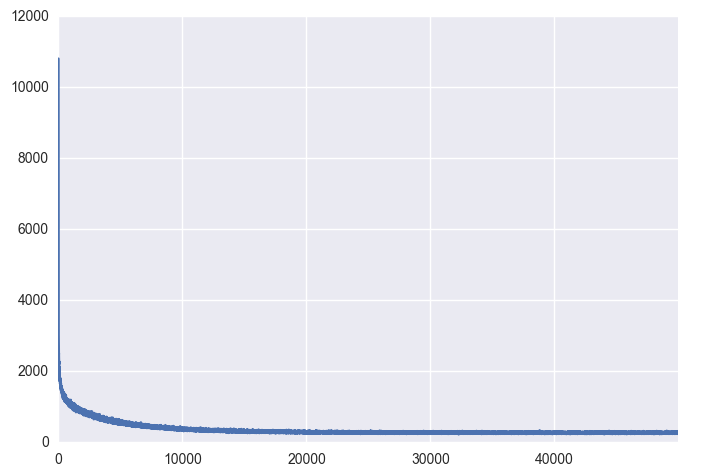

In [16]:
pd.Series(clf.cost_).plot()